 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [286]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [287]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [288]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [289]:
# Drop nulls
whale_returns.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [290]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
algo_returns = algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [291]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [292]:
# Drop nulls
algo_returns.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [293]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_returns = pd.read_csv(sp500_history_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
sp500_returns = sp500_returns.sort_index()
sp500_returns.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [294]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [295]:
# Fix Data Types
sp500_returns ["Close"] = pd.to_numeric(sp500_returns["Close"].str.replace("$", ""))
sp500_returns.head()
sp500_returns.dtypes

Close    float64
dtype: object

In [296]:
# Calculate Daily Returns
daily_returns = sp500_returns.pct_change()
sp500_returns = daily_returns
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [297]:
# Drop nulls
sp500_returns.dropna()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [298]:
# Rename Column
column = ["SP500"]
sp500_returns.columns = column
sp500_returns.head().dropna()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


## Combine Whale, Algorithmic, and S&P 500 Returns

In [299]:
# Concatenate all DataFrames into a single DataFrame
joined_df = pd.concat([whale_returns, algo_returns, sp500_returns], axis = "columns", join = "inner")
joined_df.head().dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

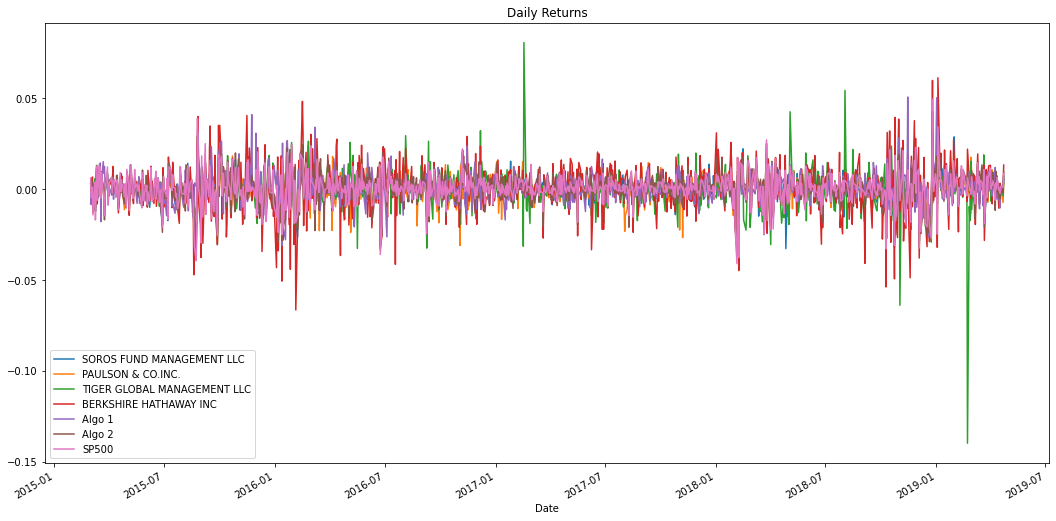

In [300]:
# Plot daily returns
joined_df.plot(figsize = (18, 9), title = "Daily Returns")

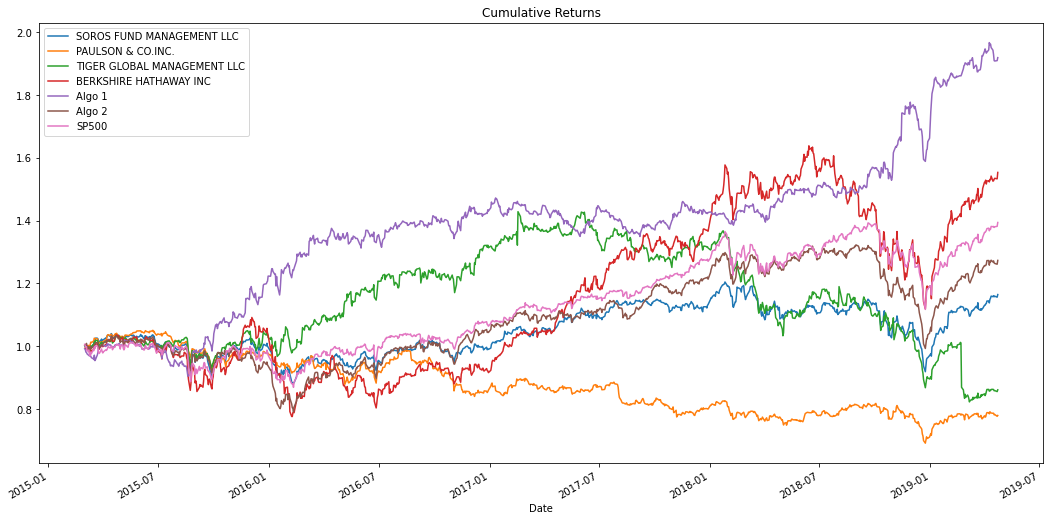

In [301]:
# Plot cumulative returns
cumulative_returns = (1 + joined_df).cumprod()
cumulative_returns.plot(figsize = (18, 9), title = "Cumulative Returns")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

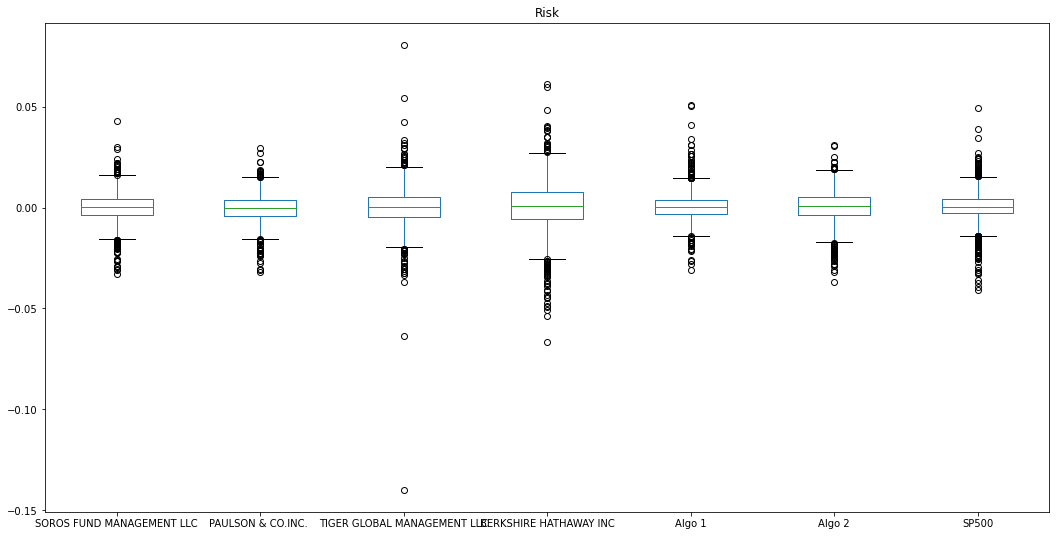

In [302]:
# Box plot to visually show risk
joined_df.plot.box(figsize = (18, 9), title = "Risk")

In [303]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
joined_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007621
Algo 2                         0.008339
SP500                          0.008551
dtype: float64

In [304]:
# Determine which portfolios are riskier than the S&P 500
sp500 = joined_df["SP500"].std()
joined_df.std() < sp500

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.               True
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
Algo 1                          True
Algo 2                          True
SP500                          False
dtype: bool

In [305]:
# Calculate the annualized standard deviation (252 trading days)
joined_df.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120987
Algo 2                         0.132374
SP500                          0.135751
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

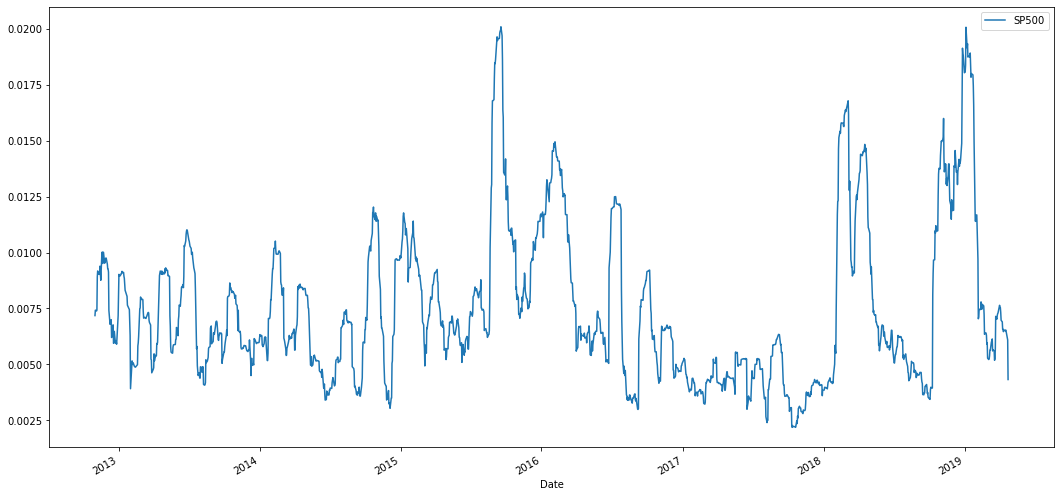

In [306]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
sp500_returns.rolling(window = 21).std().plot(figsize = (18, 9))

In [307]:
# Construct a correlation table
correlation = joined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.287650,0.278505
Algo 2,0.826873,0.678152,0.507414,0.688082,0.287650,1.000000,0.858753
SP500,0.837864,0.669732,0.623946,0.751371,0.278505,0.858753,1.000000


In [308]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance = joined_df["Algo 1"].cov(joined_df["SP500"])
variance = joined_df["Algo 1"].var()
algo_1_beta = covariance / variance
algo_1_beta

0.31249172356217114

In [309]:
# Calculate a rolling window using the exponentially weighted moving average. 
rolling_joined_df_20 = joined_df.rolling(window=20).mean()
rolling_joined_df_20.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-30,0.001142,0.000724,0.000690,0.000048,0.000550,0.000140,-0.000701
2015-03-31,0.000933,0.000822,0.000516,0.000469,0.000764,0.000023,-0.000914
2015-04-01,0.000868,0.000668,0.000543,0.000065,0.001045,0.000052,-0.000893
2015-04-02,0.000795,0.000679,0.000578,-0.000173,0.001137,0.000080,-0.000776
2015-04-06,0.001459,0.001046,0.001234,0.000728,0.001220,0.000971,0.000263
...,...,...,...,...,...,...,...
2019-04-16,0.001515,0.000059,0.001266,0.001499,0.001013,0.000670,0.001320
2019-04-17,0.001604,-0.000041,0.001416,0.001680,0.000957,0.000358,0.001353
2019-04-18,0.000921,-0.000217,0.000500,0.001109,0.000926,0.000061,0.000890


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [310]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (joined_df.mean() * 252) / (joined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.360829
Algo 2                         0.506929
SP500                          0.658706
dtype: float64

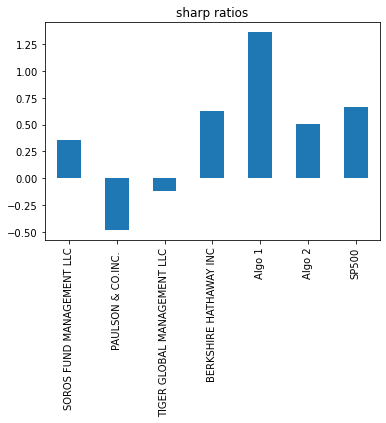

In [311]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "sharp ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [312]:
# Read the first stock
goog_historical_csv = Path("Resources/goog_historical.csv")
goog_historical_df = pd.read_csv(goog_historical_csv, index_col = "Trade DATE", infer_datetime_format = True, parse_dates = True)
goog_historical_df = goog_historical_df.sort_index()
goog_historical_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [313]:
# Read the second stock
cost_historical_csv = Path("Resources/cost_historical.csv")
cost_historical_df = pd.read_csv(cost_historical_csv, index_col = "Trade DATE", infer_datetime_format = True, parse_dates = True)
cost_historical_df = cost_historical_df.sort_index()
cost_historical_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [314]:
# Read the third stock
aapl_historical_csv = Path("Resources/aapl_historical.csv")
aapl_historical_df = pd.read_csv(aapl_historical_csv, index_col = "Trade DATE", infer_datetime_format = True, parse_dates = True)
aapl_historical_df = aapl_historical_df.sort_index()
aapl_historical_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [315]:
# Concatenate all stocks into a single DataFrame
all_df = pd.concat([goog_historical_df, cost_historical_df, aapl_historical_df], axis = "columns", join = "inner")
all_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,COST,195.76,AAPL,188.59
2018-05-14,GOOG,1100.20,COST,195.88,AAPL,188.15
2018-05-15,GOOG,1079.23,COST,195.48,AAPL,186.44
2018-05-16,GOOG,1081.77,COST,198.71,AAPL,188.18
2018-05-17,GOOG,1078.59,COST,199.60,AAPL,186.99


In [316]:
# Reset the index
all_df = all_df.reset_index()
all_df.head()

,Trade DATE,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
0,2018-05-11,GOOG,1098.26,COST,195.76,AAPL,188.59
1,2018-05-14,GOOG,1100.20,COST,195.88,AAPL,188.15
2,2018-05-15,GOOG,1079.23,COST,195.48,AAPL,186.44
3,2018-05-16,GOOG,1081.77,COST,198.71,AAPL,188.18
4,2018-05-17,GOOG,1078.59,COST,199.60,AAPL,186.99


In [317]:
# Pivot so that each column of prices represents a unique symbol
all_prices = pd.concat([goog_historical_df, cost_historical_df, aapl_historical_df], axis="rows", join="inner")
all_prices = all_prices.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
all_prices.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [318]:
# Drop Nulls
all_prices.dropna()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [319]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3] 
portfolio_returns = all_prices.dot(weights)
portfolio_returns.head()

Trade DATE
2018-05-11    494.203333
2018-05-14    494.743333
2018-05-15    487.050000
2018-05-16    489.553333
2018-05-17    488.393333
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [320]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
new_portfolio = pd.concat([all_prices, whale_returns, algo_returns, sp500_returns ], axis = "columns", join = "inner")
new_portfolio.tail()

,AAPL,COST,GOOG,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2019-04-16,199.25,245.34,1227.13,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,203.13,245.56,1236.34,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,203.86,245.81,1236.37,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,204.53,243.42,1248.84,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,207.48,245.58,1264.55,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


In [321]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_portfolio.dropna(inplace = True)
new_portfolio.isnull().sum()

AAPL                           0
COST                           0
GOOG                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [322]:
# Risk
new_portfolio.std() * np.sqrt(252)

AAPL                            344.802635
COST                            220.948359
GOOG                           1061.843252
SOROS FUND MANAGEMENT LLC         0.146455
PAULSON & CO.INC.                 0.116489
TIGER GLOBAL MANAGEMENT LLC       0.232069
BERKSHIRE HATHAWAY INC            0.246672
Algo 1                            0.133423
Algo 2                            0.139262
SP500                             0.151739
dtype: float64

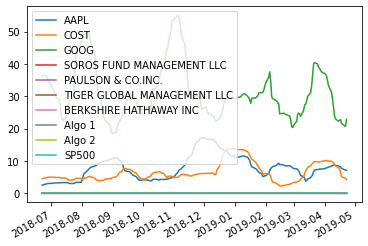

In [323]:
# Rolling
new_portfolio.rolling(window=30).std().plot()

In [324]:
# Annualized Sharpe Ratios
sharpe_ratios = (new_portfolio.mean() * 252) / (new_portfolio.std() * np.sqrt(252)).dropna()
sharpe_ratios

AAPL                           139.616024
COST                           252.078163
GOOG                           269.070811
SOROS FUND MANAGEMENT LLC        0.395449
PAULSON & CO.INC.                0.267115
TIGER GLOBAL MANAGEMENT LLC     -1.019946
BERKSHIRE HATHAWAY INC           0.141691
Algo 1                           2.034208
Algo 2                           0.082577
SP500                            0.595486
dtype: float64

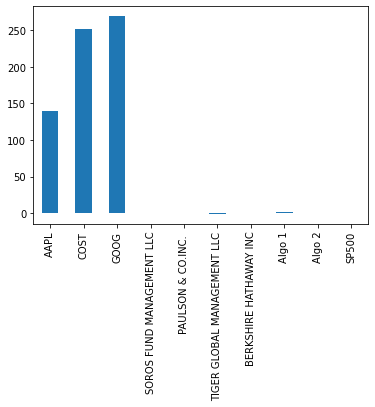

In [325]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

In [326]:
# Create a correlation analysis
correlation = new_portfolio.corr()
correlation

,AAPL,COST,GOOG,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
AAPL,1.000000,0.565591,0.538068,-0.047528,0.006708,0.027448,-0.083641,-0.008146,-0.073844,-0.005174
COST,0.565591,1.000000,0.489901,0.035297,0.009566,0.036355,0.003951,0.032157,0.004198,0.063503
GOOG,0.538068,0.489901,1.000000,0.122046,0.138976,0.096784,0.066905,-0.070771,0.143202,0.179623
SOROS FUND MANAGEMENT LLC,-0.047528,0.035297,0.122046,1.000000,0.791191,0.477722,0.816670,0.337809,0.862258,0.876089
PAULSON & CO.INC.,0.006708,0.009566,0.138976,0.791191,1.000000,0.485421,0.650499,0.361243,0.783646,0.766696
TIGER GLOBAL MANAGEMENT LLC,0.027448,0.036355,0.096784,0.477722,0.485421,1.000000,0.325080,0.114449,0.409472,0.481095
BERKSHIRE HATHAWAY INC,-0.083641,0.003951,0.066905,0.816670,0.650499,0.325080,1.000000,0.327043,0.782646,0.851968
Algo 1,-0.008146,0.032157,-0.070771,0.337809,0.361243,0.114449,0.327043,1.000000,0.365496,0.289290
Algo 2,-0.073844,0.004198,0.143202,0.862258,0.783646,0.409472,0.782646,0.365496,1.000000,0.875699
SP500,-0.005174,0.063503,0.179623,0.876089,0.766696,0.481095,0.851968,0.289290,0.875699,1.000000


In [327]:
# Beta
covariance = new_portfolio["AAPL"].cov(new_portfolio["SP500"])
variance = new_portfolio["AAPL"].var()
beta = (covariance / variance)
beta

-2.2769303141144268e-06